__SEMESTER PROJECT: PART 2__

Kaitlyn Watson

Section 004 Dr. Fang

__INTRODUCTION__

\__RESEARCH QUESTION__

How has the type of avocado, the region in which it is located, and the various PLU numbers impact the average price at which it is sold? 

__SOURCES__

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
Avocados=pd.read_csv("avocado.csv")
Avocados.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [2]:
Avocados1 = Avocados.loc[:, ~Avocados.columns.str.contains('^Unnamed')]
Avocados2=Avocados1.drop(columns="Date")

__URL__:https://www.kaggle.com/datasets/neuromusic/avocado-prices?select=avocado.csv

I will be using several visualizations using matplotlib and resources from panda. Majority of these visualizations will be done in graphs and extracting certain elements from the data set. 

https://pandas.pydata.org/docs/user_guide/visualization.html

In [3]:

Avocados_with_index = Avocados2.set_index("region")
Avocados_by_region=Avocados_with_index.drop(['Albany','Atlanta','California','BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston','Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Nashville', 'NewOrleansMobile', 'NorthernNewEngland',
       'NewYork','Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh','Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 
       'SouthCentral','SouthCarolina','Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS','WestTexNewMexico'] ) 

Avocados_by_region.head()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
region,,,,,,,,,,,
GreatLakes,1.01,2580602.96,336673.70,1411808.83,254629.93,577490.50,400003.80,98401.09,79085.61,conventional,2015
GreatLakes,1.01,2504745.45,383701.76,1337404.03,241580.61,542059.05,358218.65,122999.48,60840.92,conventional,2015
GreatLakes,1.03,2608448.06,463349.67,1342449.84,228576.54,574072.01,409909.70,148004.93,16157.38,conventional,2015
GreatLakes,1.00,2981347.20,401676.14,1680591.43,398320.64,500758.99,325850.00,124306.44,50602.55,conventional,2015
GreatLakes,1.07,2198408.92,318661.40,1199426.12,248818.72,431502.68,328369.47,83149.01,19984.20,conventional,2015


In [26]:
Avocados_Region=Avocados_by_region.reset_index()
Avocados_Region['region'].unique()

array(['GreatLakes', 'Midsouth', 'Northeast', 'Plains', 'Southeast',
       'West'], dtype=object)

<Figure size 360x360 with 0 Axes>

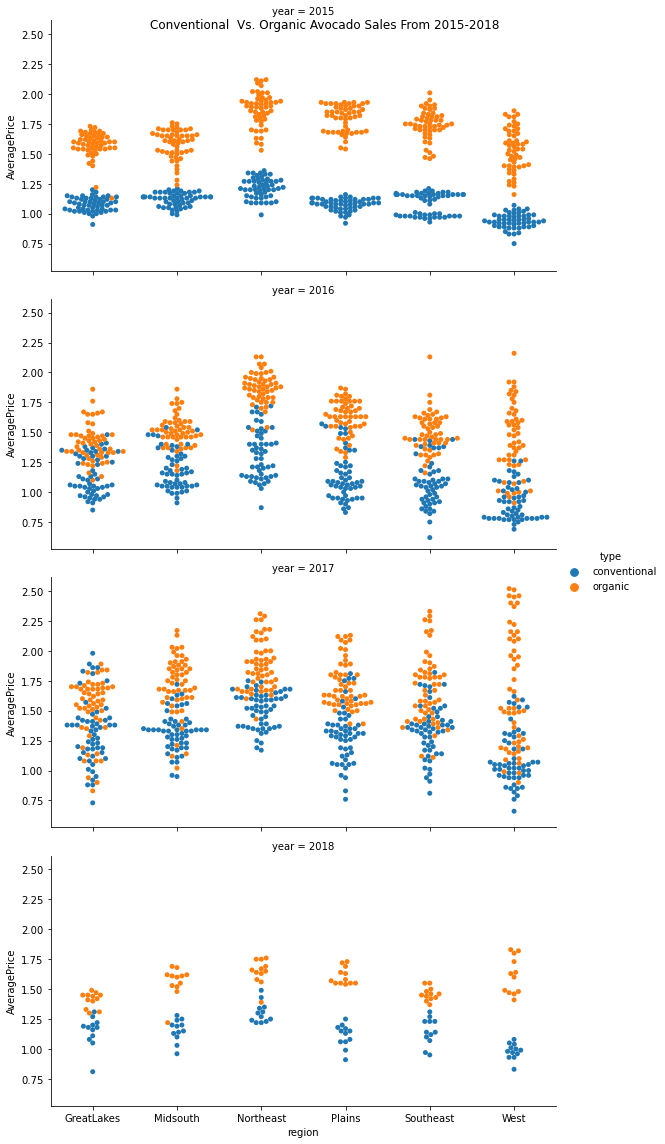

In [85]:

plt.figure(figsize=(5,5))

g = sns.catplot(x="region", y="AveragePrice",
                hue="type", row="year",
                data=Avocados_Region, kind="swarm",
                height=4, aspect=2);
g.fig.suptitle('Conventional  Vs. Organic Avocado Sales From 2015-2018')
g.set_xlabels(visible=True)
g.set_ylabels('AveragePrice')
plt.show()


Text(0.5, 1.0, 'Distribution of Avocado Prices Among Regions')

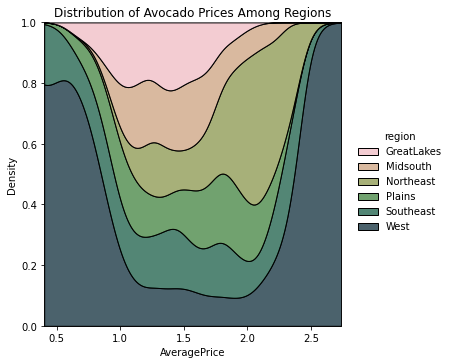

In [89]:

sns.displot(
    data=Avocados_Region,
    x="AveragePrice", hue="region",
    kind="kde", height=5,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-0.9,hue=1,light=.8",)

plt.title('Distribution of Avocado Prices Among Regions', fontsize = 12)



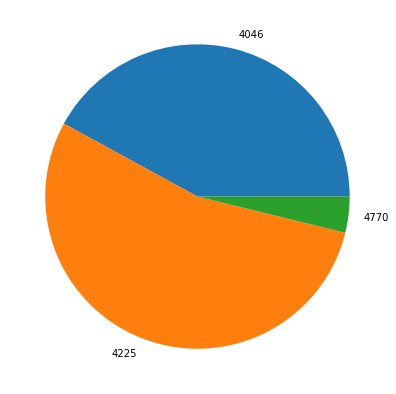

In [120]:
plu=[]

plu.append(np.mean(Avocados_Region['4046']))
plu.append(np.mean(Avocados_Region['4225']))
plu.append(np.mean(Avocados_Region['4770']))

labels=['4046', '4225', '4770']

fig = plt.figure(figsize =(10, 7))
g=plt.pie(plu, labels=labels)



In [139]:
Avo_4046=Avocados_Region[['4046','type']]

print(Avo_4046['type'].value_counts())

Avo_4225=Avocados_Region[['4225','type']]
Avo_4225.head()

print(Avo_4225['type'].value_counts())



conventional    1014
organic         1014
Name: type, dtype: int64
conventional    1014
organic         1014
Name: type, dtype: int64


In [ ]:

# Import libraries
from matplotlib import pyplot as plt
import numpy as np
 
 
# Creating dataset
size = 3
PLU = ['4046', '4225', '4770']
 
data = np.array([[23, 16], [17, 23],
                 [35, 11])
 
# normalizing data to 2 pi
norm = data / np.sum(data)*2 * np.pi
 
# obtaining ordinates of bar edges
left = np.cumsum(np.append(0,
                           norm.flatten()[:-1])).reshape(data.shape)
 
# Creating color scale
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(6)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9,
                              10, 12, 13, 15,
                              17, 18, 20 ]))
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7),
                       subplot_kw = dict(polar = True))
 
ax.bar(x = left[:, 0],
       width = norm.sum(axis = 1),
       bottom = 1-size,
       height = size,
       color = outer_colors,
       edgecolor ='w',
       linewidth = 1,
       align ="edge")
 
ax.bar(x = left.flatten(),
       width = norm.flatten(),
       bottom = 1-2 * size,
       height = size,
       color = inner_colors,
       edgecolor ='w',
       linewidth = 1,
       align ="edge")
 
ax.set(title ="Nested pie chart")
ax.set_axis_off()
                 
                 
                 
                 
Data15=Avocados_Region['year']==2015
Avocados15=Avocados_Region[Data15]

Data16=Avocados_Region['year']==2016
Avocados16=Avocados_Region[Data16]


Data17=Avocados_Region['year']==2017
Avocados17=Avocados_Region[Data17]


Data18=Avocados_Region['year']==2018
Avocados18=Avocados_Region[Data18]




In [ ]:
__https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/__